In [113]:
data = """
jimmy
curry
podz
curry
green

curry
buddy

curry
podz

curry
podz
green

green
curry

curry
jimmy
green
jimmy

curry
green
podz

curry
buddy

curry
buddy
curry
podz

curry
podz
jimmy
podz
jimmy
buddy

podz
gp2
post
green
curry
post

curry
gp2
post

podz
post
green
gp2

curry

gp2
post
green
gp2
podz

curry
post
gp2
jimmy

curry
post
gui
jimmy
gui

curry
gp2

curry
jimmy
gp2
post

podz
gui
post
gp2
gui

jimmy
gui
jimmy
gp2

jimmy
gui
gp2

podz
gui
podz
buddy
jimmy
podz
gui
jimmy

podz
gui
podz
jimmy

green
gp2

moody
green
jimmy

podz
moody
podz
moody
green

moody
podz
post
gui
podz

podz
green
gui
podz

moody
post

podz
green

moody
green
podz
green
gui

gui
green
moody

curry
looney

gui
curry
moody

gui
curry

looney
curry 
jimmy
gui
curry

jimmy
moody

looney
moody

curry
looney
gui

moody
curry
looney

jimmy
gp2
podz
curry

looney
gp2
jimmy

green
buddy
green
podz

podz
green
curry

jimmy
podz
green

buddy
jimmy
"""
players = set()
for line in data.strip().split('\n'):
    line = line.strip()
    if line:
        players.add(line)
sorted_players = sorted(list(players))
sorted_players_end = sorted_players.copy()
sorted_players_end.append('END')

#Debugging
print(sorted_players)
print(sorted_players_end)

['buddy', 'curry', 'gp2', 'green', 'gui', 'jimmy', 'looney', 'moody', 'podz', 'post']
['buddy', 'curry', 'gp2', 'green', 'gui', 'jimmy', 'looney', 'moody', 'podz', 'post', 'END']


In [114]:
import numpy as np
# count_passes[0][0] represents buddy pass to buddy
# count_passes[1][0] represents curry pass to buddy

count_passes = [[0] * (len(sorted_players)) for _ in range(len(sorted_players))]
count_passes_end = [[0] * (len(sorted_players_end)) for _ in range(len(sorted_players_end))]
count_passes_end[len(sorted_players_end)-1][len(sorted_players_end)-1] = 1
len(sorted_players_end)
prev = ""
for line in data.strip().split('\n'):
    line = line.strip()
    if line:
        if prev == "":
            prev = line
        else:
            prev_player_idx = sorted_players.index(prev)
            new_player_idx = sorted_players.index(line)
            prev = line

            # want columns to be current state and rows to be next state
            # getting the counts of prev player passing to new player
            count_passes[new_player_idx][prev_player_idx] += 1
            count_passes_end[new_player_idx][prev_player_idx] += 1
            
            # Debugging
            # print([new_player_idx, prev_player_idx])
    else:
        prev_player_idx = sorted_players.index(prev)
        new_player_idx = len(sorted_players_end)-1
        count_passes_end[new_player_idx][prev_player_idx] += 1
        prev = ""

# Debugging
print("Count of the number of passes where column is Current player and Row is Next Player")
for row in count_passes:
    print(row)
print("")

print("Count of the number of passes where column is Current player and Row is Next Player for 2D array WITH END")
for row in count_passes_end:
    print(row)
print("")

# Divide by sum of the columns to get probability of passing from current state to next state
transition_matrix = np.array(count_passes)
column_sums = transition_matrix.sum(axis=0, keepdims=True)
print("Sum of the columns")
print(column_sums)
print("")

transition_matrix = transition_matrix / column_sums
np.set_printoptions(formatter={'float': lambda x: f'{x:.2f} '}, suppress=True)
print("Transition Matrix where Columns are the Current Player and Rows are the Next Player")
print(transition_matrix)
print("")

# Divide by sum of the columns to get probability of passing from current state to next state WITH END
transition_matrix_end = np.array(count_passes_end)
column_sums_end = transition_matrix_end.sum(axis=0, keepdims=True)
print("Sum of the columns WITH END")
print(column_sums_end)
print("")

transition_matrix_end = transition_matrix_end / column_sums_end
print("Transition Matrix where Columns are the Current Player and Rows are the Next Player WITH END")
print(transition_matrix_end)
print("")


# Debugging
column_sums_to_1 = transition_matrix.sum(axis=0, keepdims=True)
print("Validating Columns Sum to 1")
print(column_sums_to_1)
print("")

column_sums_to_1_end = transition_matrix_end.sum(axis=0, keepdims=True)
print("Validating Columns Sum to 1 WITH END")
print(column_sums_to_1_end)
print("")



Count of the number of passes where column is Current player and Row is Next Player
[0, 3, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 3, 3, 1, 1, 1, 2, 0]
[0, 2, 0, 3, 1, 3, 1, 0, 1, 2]
[1, 2, 0, 0, 1, 1, 0, 3, 6, 3]
[0, 0, 1, 2, 0, 4, 1, 0, 4, 2]
[2, 3, 2, 2, 3, 0, 0, 0, 3, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 1, 1, 0, 2, 0]
[0, 5, 2, 3, 4, 3, 0, 2, 0, 0]
[0, 3, 4, 0, 1, 0, 0, 1, 2, 0]

Count of the number of passes where column is Current player and Row is Next Player for 2D array WITH END
[0, 3, 0, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 0, 3, 3, 1, 1, 1, 2, 0, 0]
[0, 2, 0, 3, 1, 3, 1, 0, 1, 2, 0]
[1, 2, 0, 0, 1, 1, 0, 3, 6, 3, 0]
[0, 0, 1, 2, 0, 4, 1, 0, 4, 2, 0]
[2, 3, 2, 2, 3, 0, 0, 0, 3, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0]
[0, 5, 2, 3, 4, 3, 0, 2, 0, 0, 0]
[0, 3, 4, 0, 1, 0, 0, 1, 2, 0, 0]
[3, 6, 5, 5, 4, 6, 2, 4, 7, 4, 1]

Sum of the columns
[[ 4 22  9 15 13 14  4  7 21  7]]

Transition Matrix where Columns are the Current Player and Rows are th

State Diagram for Warriors Passing WITHOUT END


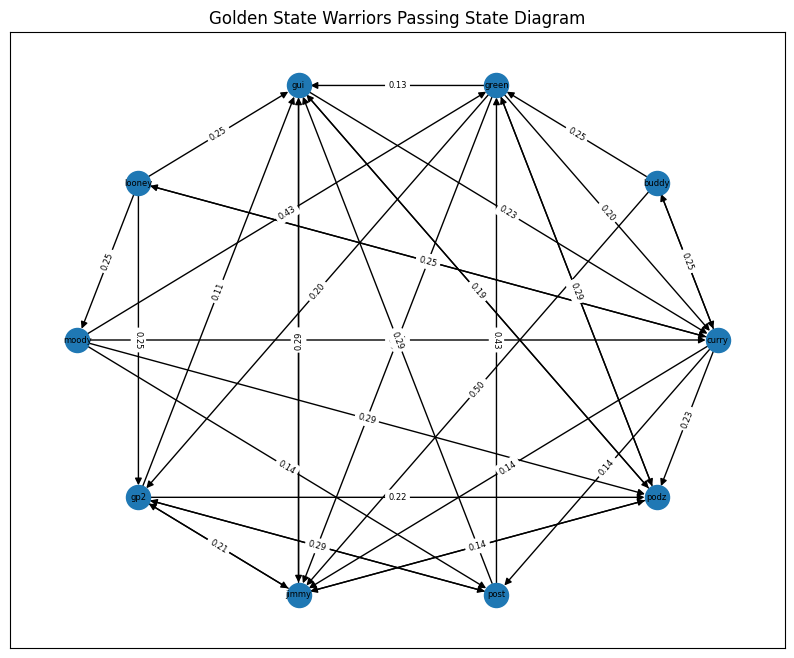


State Diagram for Warriors Passing WITH END


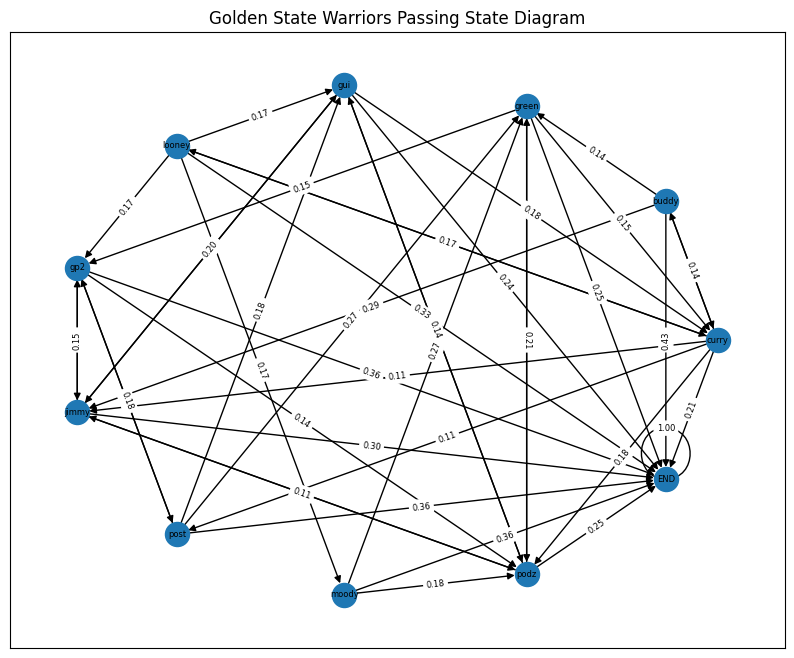

In [115]:
import networkx as nx
import matplotlib.pyplot as plt

# transition_matrix
# transition_matrix_end

# sorted_players
# sorted_players_end

# creating Markov Chain State Diagram
def statediagram(arr_players, trans_matrix):
    state_diagram = nx.DiGraph()
    for i in range(len(arr_players)):
        for j in range(len(arr_players)):
            prob = trans_matrix[i, j]
            #Only visualizing big probabilities because too many arrows mess up the diagram
            if prob > 0.1:
                state_diagram.add_edge(arr_players[j], arr_players[i], weight=prob)
    layout = nx.circular_layout(state_diagram)
    edge = state_diagram.edges(data=True)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(state_diagram, layout)
    nx.draw_networkx_labels(state_diagram, layout, font_size=6)
    nx.draw_networkx_edges(state_diagram, layout, edgelist=edge, arrowstyle='-|>')
    nx.draw_networkx_edge_labels(state_diagram, layout, edge_labels={(i, j): f"{d['weight']:.2f}" for i, j, d in edge}, font_size=6)

    plt.title("Golden State Warriors Passing State Diagram")
    plt.show()

print("State Diagram for Warriors Passing WITHOUT END")
statediagram(sorted_players, transition_matrix)
print("")

print("State Diagram for Warriors Passing WITH END")
statediagram(sorted_players_end, transition_matrix_end)
print("")


In [116]:
# transition_matrix
# transition_matrix_end

#longterm probabilities 
print("Longterm probabilities of the transition matrix")
Pn = np.linalg.matrix_power(transition_matrix, 10000000) 
print(f"{Pn}\n")

#longterm probabilities with END
print("Longterm probabilities of the transition matrix with END")
Pn_end = np.linalg.matrix_power(transition_matrix_end, 10000000) 
print(f"{Pn_end}\n")


Longterm probabilities of the transition matrix
[[0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04 ]
 [0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11 ]
 [0.12  0.12  0.12  0.12  0.12  0.12  0.12  0.12  0.12  0.12 ]
 [0.15  0.15  0.15  0.15  0.15  0.15  0.15  0.15  0.15  0.15 ]
 [0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13 ]
 [0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14  0.14 ]
 [0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01 ]
 [0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04 ]
 [0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16 ]
 [0.10  0.10  0.10  0.10  0.10  0.10  0.10  0.10  0.10  0.10 ]]

Longterm probabilities of the transition matrix with END
[[0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 ]
 [0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 ]
 [0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 ]
 [0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  